<a href="https://colab.research.google.com/github/Eduardo-G0nzalez/ev4MachineLearning/blob/main/supportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Support Vector Machine (sVm)

## Desarrollo sVm

🔍 Mejor combinación de parámetros: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
✅ Precisión del modelo SVM: 0.6838470608051205

📋 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75     14216
           1       0.63      0.51      0.56      9532

    accuracy                           0.68     23748
   macro avg       0.67      0.66      0.66     23748
weighted avg       0.68      0.68      0.68     23748



/tmp/ipython-input-1-2945498607.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="pastel")


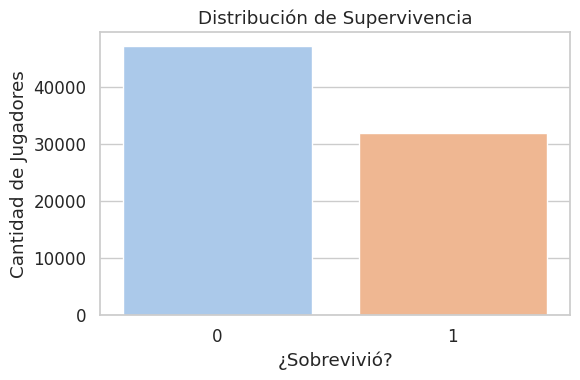

/tmp/ipython-input-1-2945498607.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="RoundKills", data=df, palette="Set2")


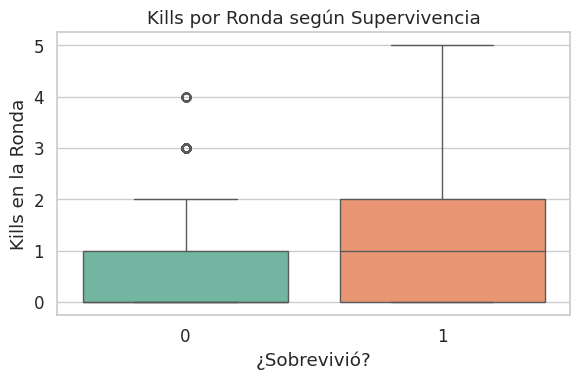

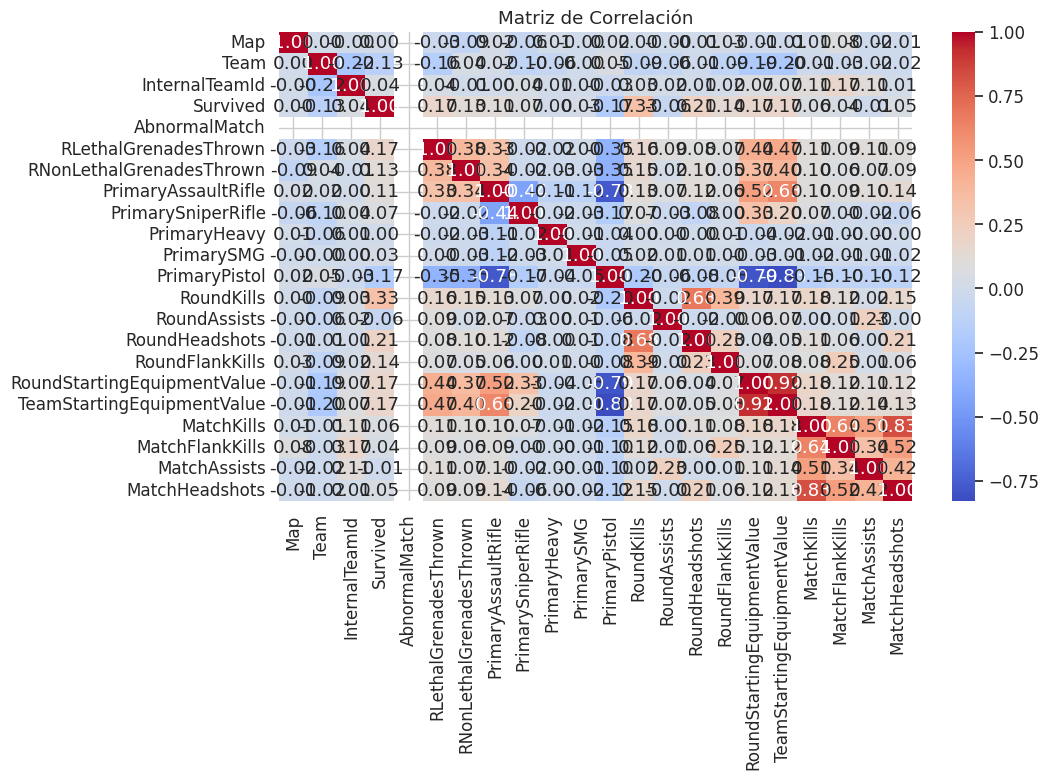

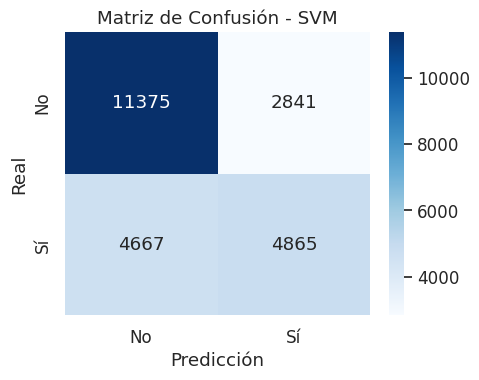

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Cargar y preparar los datos ---
df = pd.read_csv("Anexo.csv", sep=";", low_memory=False)
df = df.drop(columns=["Unnamed: 0", "MatchId", "RoundId", "FirstKillTime", "TimeAlive", "TravelledDistance"])

for col in ["Map", "Team"]:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df["Survived"] = df["Survived"].astype(int)

X = df.drop(columns=["Survived", "RoundWinner", "MatchWinner", "AbnormalMatch"])
y = df["Survived"]

# --- Escalado de características ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- División de datos ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- Optimización con GridSearchCV ---
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# --- Evaluación ---
print("🔍 Mejor combinación de parámetros:", grid_search.best_params_)
print("✅ Precisión del modelo SVM:", accuracy_score(y_test, y_pred))
print("\n📋 Reporte de clasificación:\n", classification_report(y_test, y_pred))

# --- Visualizaciones mejoradas ---
sns.set(style="whitegrid", font_scale=1.1)

# 1. Distribución de supervivencia
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="pastel")
plt.title("Distribución de Supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Cantidad de Jugadores")
plt.tight_layout()
plt.show()

# 2. Kills por ronda vs Supervivencia
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="RoundKills", data=df, palette="Set2")
plt.title("Kills por Ronda según Supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Kills en la Ronda")
plt.tight_layout()
plt.show()

# 3. Mapa de correlación
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

# 4. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.title("Matriz de Confusión - SVM")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

## Interpretación datos obtenidos

- **Precisión** general del modelo SVM fue del 68%, mostrando un buen desempeño, muy similar al Random Forest.
- **El mejor rendimiento** se obtuvo con C=1, gamma=0.1 y kernel rbf, gracias a la optimización con GridSearchCV.
- El modelo predice muy bien a los que no sobreviven (recall 80%) y de forma aceptable a los que sí (recall 51%).
- **Los jugadores que sobreviven tienden a hacer más kills**, como lo confirmó el gráfico boxplot.
- La **matriz de correlación** reafirma que variables como RoundKills, RoundHeadshots, PrimaryAssaultRifle y los valores de equipamiento se relacionan positivamente con la supervivencia.
- En conjunto con los otros modelos, SVM reafirma la hipótesis: el equipamiento y el rendimiento en combate influyen fuertemente en la supervivencia.


